<a href="https://colab.research.google.com/github/OJB-Quantum/Qiskit-Metal-to-Litho/blob/main/High_Resolution_Lithography_Critical_Dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Common Lithography Critical Dimensions (High Resolution)

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

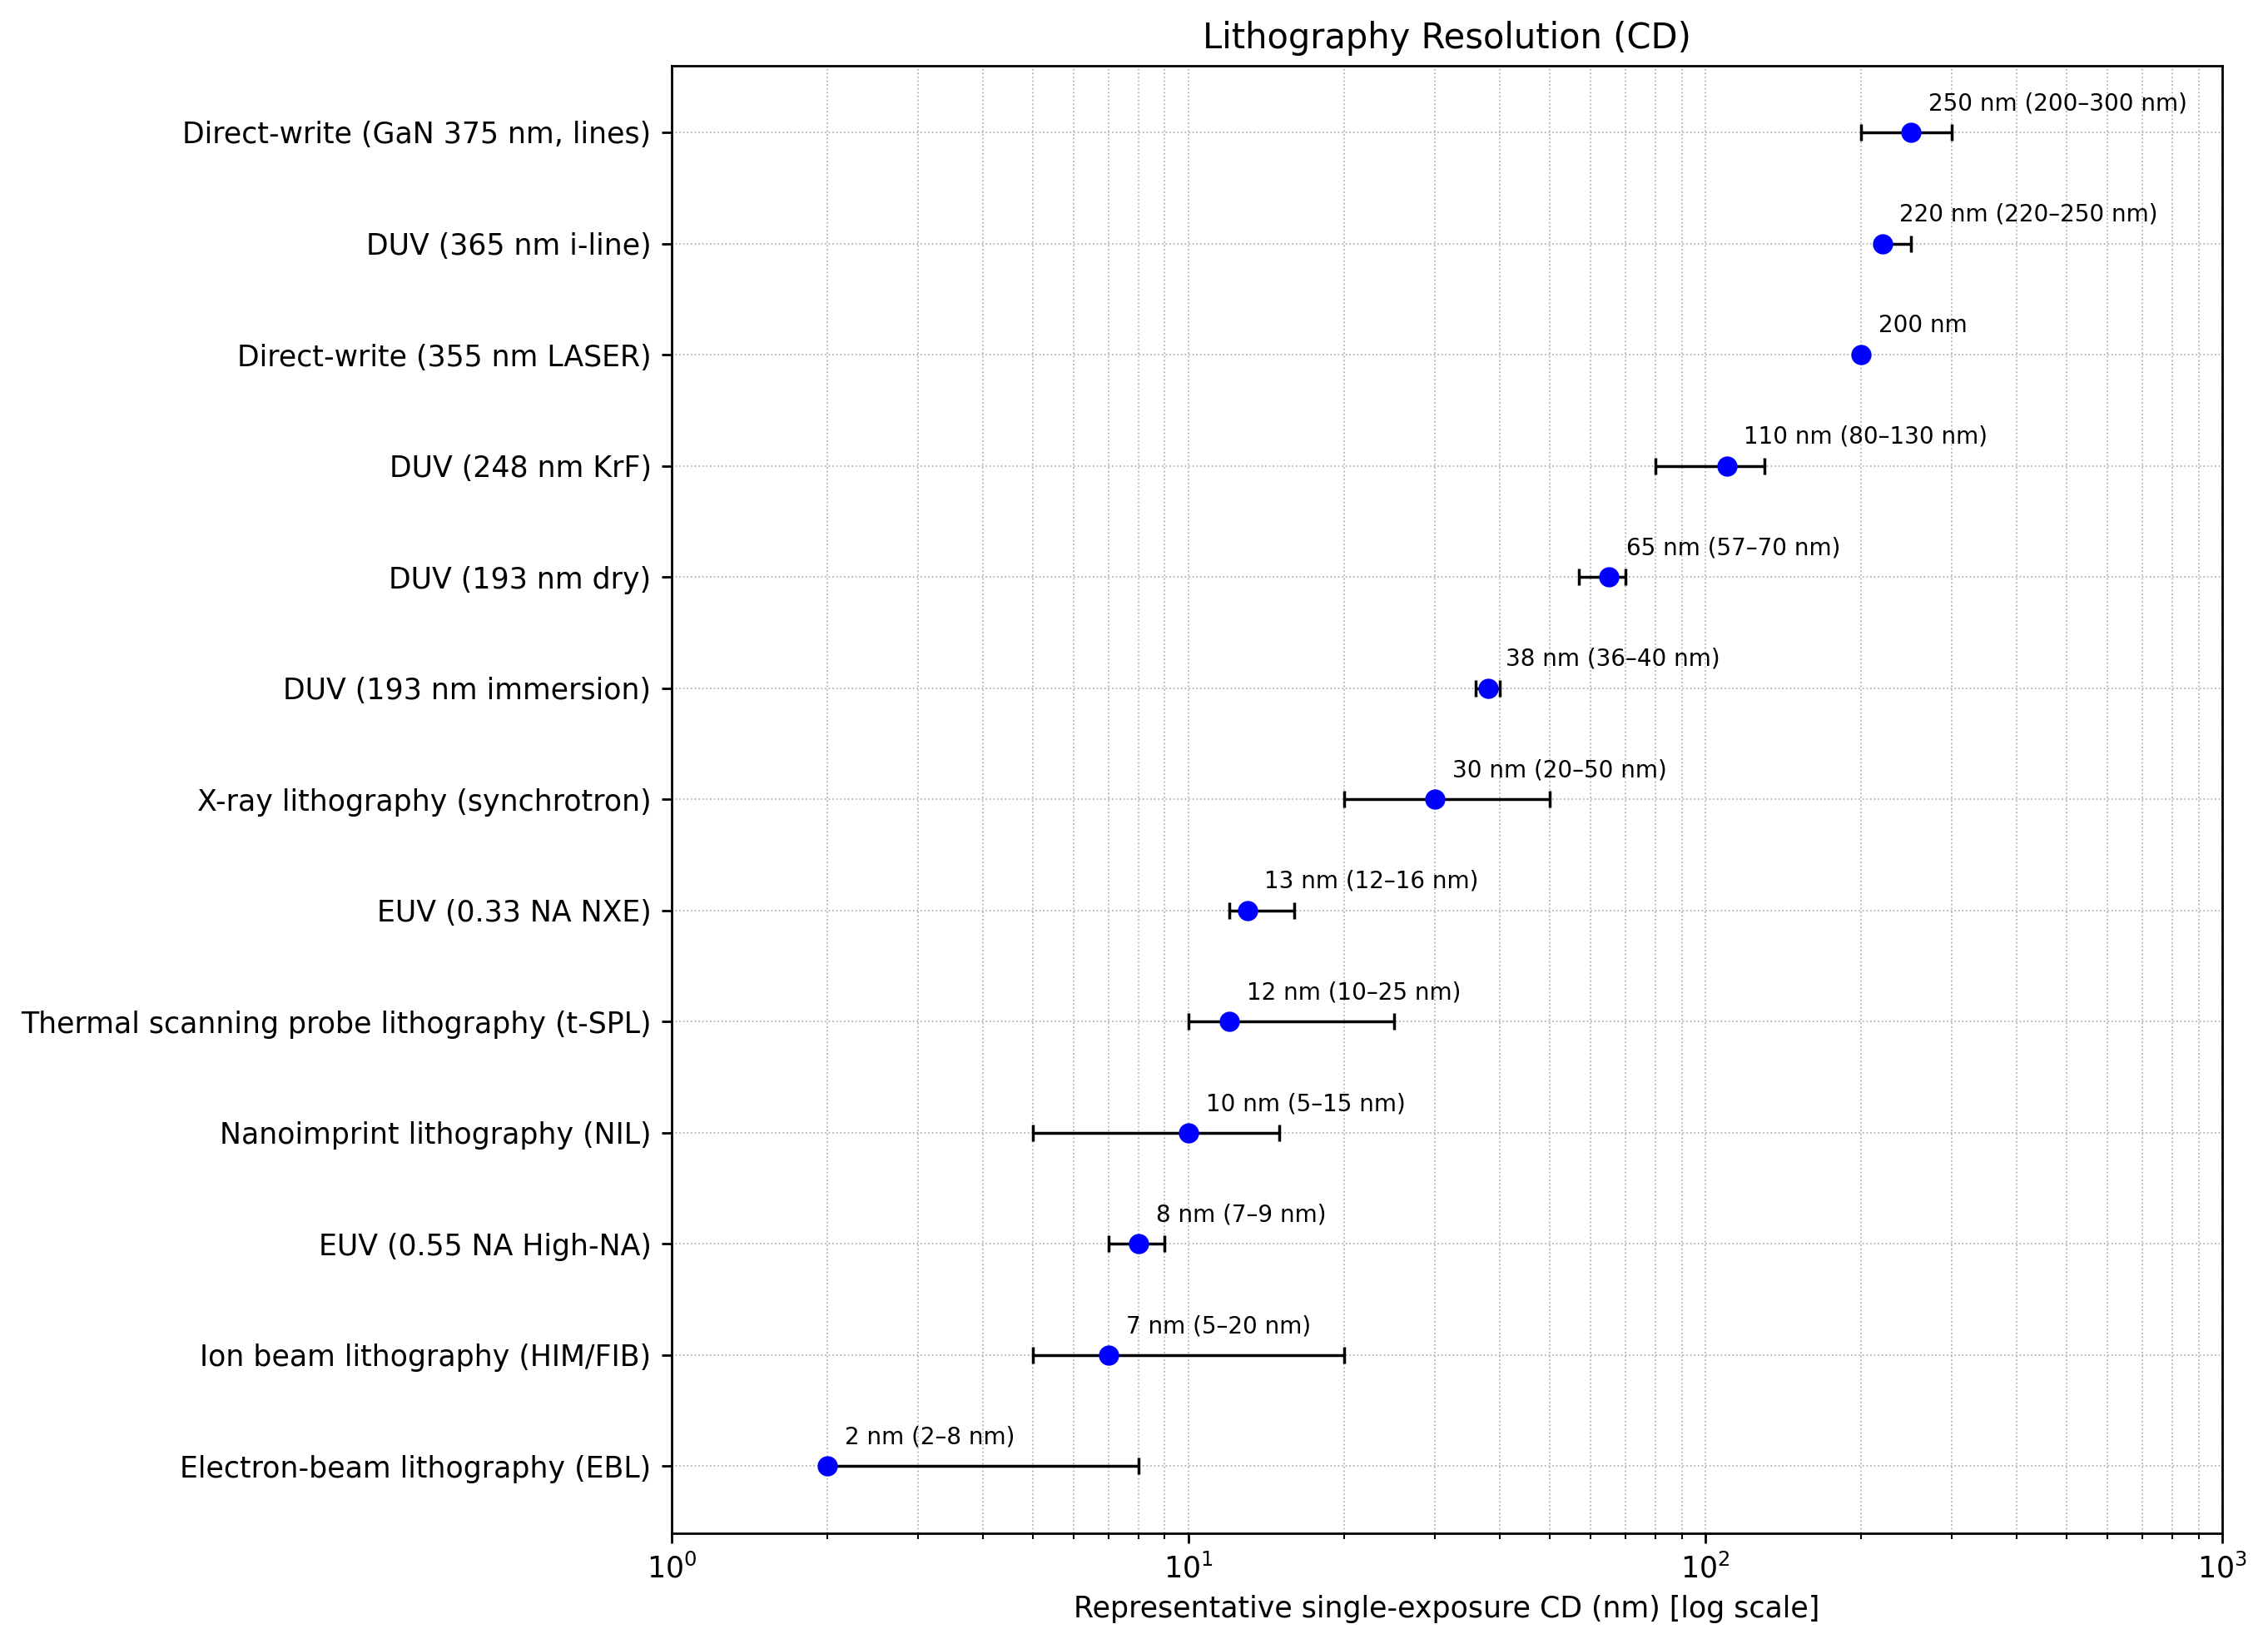

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

records = [
    {"Method": "Electron-beam lithography (EBL)", "Class": "Direct-write",
     "Center_CD_nm": 2.0, "Range_min_nm": 2.0, "Range_max_nm": 8.0,
     "Wavelength_or_NA": "e-beam (resist‑limited)",
     "Evidence": "2 nm isolated HSQ features; single-digit nm widely reported."},
    {"Method": "EUV (0.55 NA High-NA)", "Class": "Optical (13.5 nm)",
        "Center_CD_nm": 8.0, "Range_min_nm": 7.0, "Range_max_nm": 9.0,
        "Wavelength_or_NA": "λ = 13.5 nm, NA = 0.55",
        "Evidence": "ASML EXE High‑NA resolution near 8 nm."},
    {"Method": "EUV (0.33 NA NXE)", "Class": "Optical (13.5 nm)",
        "Center_CD_nm": 13.0, "Range_min_nm": 12.0, "Range_max_nm": 16.0,
        "Wavelength_or_NA": "λ = 13.5 nm, NA = 0.33",
        "Evidence": "NXE ~13 nm single‑exposure resolution."},
    {"Method": "Nanoimprint lithography (NIL)", "Class": "Imprint (UV)",
        "Center_CD_nm": 10.0, "Range_min_nm": 5.0, "Range_max_nm": 15.0,
        "Wavelength_or_NA": "UV imprint",
        "Evidence": "Sub‑10 nm replication; ≤15 nm spec reported."},
    {"Method": "DUV (193 nm immersion)", "Class": "Optical (193 nm)",
        "Center_CD_nm": 38.0, "Range_min_nm": 36.0, "Range_max_nm": 40.0,
        "Wavelength_or_NA": "λ = 193 nm, NA ≈ 1.35",
        "Evidence": "Single‑exposure near 40 nm half‑pitch."},
    {"Method": "Direct-write (355 nm LASER)", "Class": "Maskless laser",
        "Center_CD_nm": 200.0, "Range_min_nm": 200.0, "Range_max_nm": 200.0,
        "Wavelength_or_NA": "λ = 355 nm",
        "Evidence": "DWL 66+ XR mode ~200 nm."},
    {"Method": "Direct-write (GaN 375 nm, lines)", "Class": "Maskless laser/LED",
        "Center_CD_nm": 250.0, "Range_min_nm": 200.0, "Range_max_nm": 300.0,
        "Wavelength_or_NA": "λ = 375 nm",
        "Evidence": "Vendors cite 200–300 nm for lines with 375 nm optics."},
    {"Method": "Ion beam lithography (HIM/FIB)", "Class": "Direct-write",
        "Center_CD_nm": 7.0, "Range_min_nm": 5.0, "Range_max_nm": 20.0,
        "Wavelength_or_NA": "He+, Ne+, Ga+ (species‑dependent)",
        "Evidence": "He‑ion: 5 nm half‑pitch lines; fullerene resist 7.3 nm lines; Ga+ FIB ~20 nm features."},
    {"Method": "Thermal scanning probe lithography (t‑SPL)", "Class": "Probe lithography",
        "Center_CD_nm": 12.0, "Range_min_nm": 10.0, "Range_max_nm": 25.0,
        "Wavelength_or_NA": "Heated AFM‑type tip",
        "Evidence": "IBM: <10 nm lateral; ~11 nm half‑pitch after transfer; ~25 nm HP routine."},
    {"Method": "X-ray lithography (synchrotron)", "Class": "X-ray (0.1–1 nm)",
        "Center_CD_nm": 30.0, "Range_min_nm": 20.0, "Range_max_nm": 50.0,
        "Wavelength_or_NA": "λ ≈ 1 nm",
        "Evidence": "Typical synchrotron resolution 20–50 nm."},
    {"Method": "DUV (193 nm dry)", "Class": "Optical (193 nm)",
        "Center_CD_nm": 65.0, "Range_min_nm": 57.0, "Range_max_nm": 70.0,
        "Wavelength_or_NA": "λ = 193 nm, NA < 1",
        "Evidence": "Single‑exposure ~65 nm resolution."},
    {"Method": "DUV (248 nm KrF)", "Class": "Optical (248 nm)",
        "Center_CD_nm": 110.0, "Range_min_nm": 80.0, "Range_max_nm": 130.0,
        "Wavelength_or_NA": "λ = 248 nm",
        "Evidence": "Resolutions from 80-130 nm."},
    {"Method": "DUV (365 nm i-line)", "Class": "Optical (365 nm)",
        "Center_CD_nm": 220.0, "Range_min_nm": 220.0, "Range_max_nm": 250.0,
        "Wavelength_or_NA": "λ = 365 nm",
        "Evidence": "Resolutions near 220 nm."}
]

# Create a DataFrame and sort by the center critical dimension value
df = pd.DataFrame.from_records(records).sort_values("Center_CD_nm").reset_index(drop=True)

# --- Plotting Section ---

# Prepare data for the error bar plot
ypos = np.arange(len(df))
x = df["Center_CD_nm"].to_numpy()
xerr = np.vstack([x - df["Range_min_nm"].to_numpy(),
                  df["Range_max_nm"].to_numpy() - x])

# Create the figure and axes
plt.figure(figsize=(11, 8), dpi=250)
plt.errorbar(
    x, ypos, xerr=xerr, fmt='o', capsize=3,
    ecolor='black', elinewidth=1.0,
    color='blue', markerfacecolor='blue', markeredgecolor='blue', markersize=6
)

# Helper function to format numbers for labels
def fmt_val(v):
    return f"{int(v)}" if v >= 1 else f"{v:.2f}"

# Add labels to each data point
for xi, yi, rmin, rmax in zip(x, ypos, df["Range_min_nm"], df["Range_max_nm"]):
    if np.isclose(rmin, rmax):
        label = f"{fmt_val(xi)} nm"
    else:
        label = f"{fmt_val(xi)} nm ({fmt_val(rmin)}–{fmt_val(rmax)} nm)"
    plt.annotate(label, (xi, yi), xytext=(6, 6), textcoords="offset points",
                 ha='left', va='bottom', fontsize=8)

# --- Formatting the Plot ---

# Set plot labels, titles, and scales
plt.yticks(ypos, df["Method"].tolist())
plt.xscale("log")
plt.xlim(1, 1000)
plt.xlabel("Representative single‑exposure CD (nm) [log scale]")
plt.title("Lithography Resolution (CD)")

# Add grid lines for better readability
plt.grid(True, which='both', axis='x', linestyle=':', linewidth=0.5)
plt.grid(True, which='major', axis='y', linestyle=':', linewidth=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Note that there is a known atomic resolution lithography method based on a modified scanning tunneling microscope (STM) that was used to produce the first single atom transistor. However, since this technique was produced in a research lab rather than as a commercial product, it was not included here. Such a technique is certainly capable of single atom or few Angstrom resolution, just not commercially (yet, in the far far future).

See an example of a single atom transistor made using this method here:
- https://doi.org/10.1038/nnano.2012.21
- https://youtu.be/z761a7Y012o?si=RuvtT5IIO06qB5CG
- https://youtu.be/ue4z9lB5ZHg?si=xvh-AF8JM-F5XJ9A
- https://youtu.be/ZI0F3DWDqI8?si=IE2EjC_SebYmvDtn

***

| Method | Class | Wavelength / NA | Center CD (nm) | Range min (nm) | Range max (nm) | Evidence note |
| :--- | :--- | :--- | ---:| ---:| ---:| :--- |
| **Electron-beam lithography (EBL)** | Direct-write | e-beam (resist-limited) | 2 | 2 | 8 | Single-digit-nanometer features repeatedly demonstrated; isolated ~2 nm lines reported under optimized conditions. |
| **Ion beam lithography (HIM/FIB)** | Direct-write | He⁺ / Ne⁺ / Ga⁺ (species-dependent) | 7 | 5 | 20 | Helium-ion beams have printed ~5–8 nm features; Ga⁺ FIB is more commonly used for ~20 nm scale modifications. |
| **EUV (0.55 NA High-NA)** | Optical (13.5 nm) | λ = 13.5 nm, NA = 0.55 | 8 | 7 | 9 | ASML EXE High-NA optics target ~8 nm single-exposure CDs; early results support a 7–9 nm window. |
| **Nanoimprint lithography (NIL)** | Imprint (UV) | UV imprint | 10 | 5 | 15 | Sub-10 nm replication has been shown in research; stepper-class specifications commonly cite ≤15 nm. |
| **Thermal scanning probe lithography (t-SPL)**| Probe lithography| Heated AFM-type tip | 12 | 10 | 25 | <10 nm lateral resolution demonstrated; ~11 nm half-pitch after transfer; routine ~25 nm HP in production. |
| **EUV (0.33 NA NXE)** | Optical (13.5 nm) | λ = 13.5 nm, NA = 0.33 | 13 | 12 | 16 | Mainstream NXE scanners achieve ~13 nm single-exposure resolution with typical process windows near this value. |
| **X-ray lithography (synchrotron)** | X-ray (0.1–1 nm)| λ ≈ 1 nm | 30 | 20 | 50 | A specialized technique for high-aspect-ratio structures, with typical synchrotron source resolution between 20–50 nm. |
| **DUV (193 nm immersion)** | Optical (193 nm) | λ = 193 nm, NA ≈ 1.35 | 38 | 36 | 40 | The single-exposure practical limit is near 40 nm half-pitch, depending on k₁ factor and illumination techniques. |
| **DUV (193 nm dry)** | Optical (193 nm) | λ = 193 nm, NA < 1 | 65 | 57 | 70 | Dry ArF systems achieved sub-70 nm resolution, with advanced tools pushing towards 57 nm before immersion. |
| **DUV (248 nm KrF)** | Optical (248 nm) | λ = 248 nm | 110 | 80 | 130 | A workhorse for multiple nodes, with resolutions from 130 nm down to ~80 nm using enhancement techniques. |
| **Direct-write (355 nm LASER)** | Maskless laser | λ = 355 nm | 200 | 200 | 200 | Research-grade laser writers specify ~200 nm minimum features in their high-resolution modes. |
| **DUV (365 nm i-line)** | Optical (365 nm) | λ = 365 nm | 220 | 220 | 250 | Mature i-line technology provides resolutions around 250 nm, with advanced systems capable of achieving ~220 nm. |
| **Direct-write (GaN 375 nm, lines)** | Maskless laser/LED| λ = 375 nm | 250 | 200 | 300 | Vendor documentation for 375 nm optics reports ~200–300 nm lines, with ~250 nm as a representative value. |

***

### **References**

1.  **ASML** (2024) *EUV lithography systems – products*. Veldhoven: ASML.
2.  **ASML** (2024) *TWINSCAN EXE:5000 – EUV lithography systems*. Veldhoven: ASML.
3.  **ASML** (2024) '5 things you should know about High-NA EUV lithography', *ASML News*, 25 January.
4.  **ASML** (2004) *ASML ships first TWINSCAN XT:1400 lithography system to a leading Asian chipmaker*. Veldhoven: ASML Press Release, 26 July.
5.  **Biswas, A.D., et al.** (2004) 'Simulation of the 45-nm half-pitch node with 193-nm immersion lithography', *Journal of Micro/Nanolithography, MEMS, and MOEMS*, 3(1).
6.  **Canon Inc.** (2023) *Nanoimprint lithography*. Tokyo: Canon Inc. (Technology overview).
7.  **Canon Inc.** (2024) *FPA-1200NZ2C nanoimprint stepper (product page)*. Tokyo: Canon Inc.
8.  **Camino, F.E., Mizuno, N., Du, X. and Black, C.T.** (2018) 'Single-digit nanometer electron-beam lithography with an aberration-corrected scanning transmission electron microscope', *Journal of Visualized Experiments*, e58272.
9.  **Cho, Y.K.R., Kim, T., Lee, H. and Park, I.** (2017) 'Sub-10 nm feature size in silicon using thermal scanning probe lithography', *ACS Nano*, 11(1), pp. 118–124.
10. **4PICO B.V.** (2016) *PicoMaster 200 – datasheet (375 nm direct-write lithography)*. Katwijk, The Netherlands: 4PICO.
11. **Heidelberg Instruments** (2021) *DWL 66+ – fact sheet (375 nm/405 nm)*. Heidelberg: Heidelberg Instruments Mikrotechnik GmbH.
12. **Heidelberg Instruments** (2023) *VPG 300 DI data sheet (355 nm laser mask writer)*. Heidelberg: Heidelberg Instruments Mikrotechnik GmbH.
13. **Li, L., et al.** (2012) 'Nanometer patterning by focused helium ion beam', *Journal of Vacuum Science & Technology B*, 30(6).
14. **Mack, C.A.** (2007) *Fundamental Principles of Optical Lithography: The Science of Microfabrication*. Chichester: Wiley.
15. **Manfrinato, V.R., Stein, A., Zhang, L., Nam, C.Y., Black, C.T. and Stach, E.A.** (2017) 'Aberration-corrected electron-beam lithography at the one-nanometer length scale', *Nano Letters*, 17(8), pp. 4562-4571.
16. **Manfrinato, V.R.** (2015) *Electron-beam lithography towards the atomic scale*. Ph.D. thesis, Massachusetts Institute of Technology.
17. **Merriam, A.J. and Bethune, D.S.** (2007) 'A solid-state 193 nm laser with high spatial coherence for sub-40 nm interferometric immersion lithography', *Proceedings of SPIE*, 6520, 65202Z.
18. **Optica** (2025) *Heidelberg Instruments enhances DWL 66+ lithography system, achieving 200 nm resolution and 65,536 grayscale levels*. Washington, DC: Optica Corporate Member News.
19. **Shi, X. and Wolf, B.** (2016) 'Helium ion beam lithography using fullerene molecular resists', *Microelectronic Engineering*, 155, pp. 74–81.
20. **Sreenivasan, S.V.** (2017) 'Nanoimprint lithography steppers for volume fabrication of leading-edge semiconductor integrated circuits', *Microsystems & Nanoengineering*, 3, 17075.
21. **Vladimirsky, Y., Maldonado, J. and Vladimirsky, O.** (1999) 'X-ray lithography for MEMS and LIGA', *Proceedings of SPIE*, 3680, pp. 579-586.
22. **Winston, D., Cord, B.M., Ming, B., et al.** (2009) 'Scanning-helium-ion-beam lithography with hydrogen silsesquioxane resist', *Journal of Vacuum Science & Technology B*, 27(6), pp. 2702–2706.